In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from utide import solve, reconstruct
import matplotlib.dates as mdates
import numpy as np

In [13]:
file_names = ['oct.txt', 'nov.txt', 'dec.txt', 'jan.txt', 'feb.txt']

In [14]:
# Reading each file into a DataFrame and storing them in a list.
dataframes = [pd.read_csv(file_name, sep='\s+', header=None, names=['Date', 'Day', 'Time', 'Prediction']) for file_name in file_names]

# Concatenating all DataFrames into a single DataFrame.
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'Date' and 'Time' to a datetime format and 'Prediction' to numeric, if not already done.
combined_df['DateTime'] = pd.to_datetime(combined_df['Date'] + ' ' + combined_df['Time'])
combined_df['Prediction'] = pd.to_numeric(combined_df['Prediction'])

combined_df

,Date,Day,Time,Prediction,DateTime
0,2023/10/01,Sun,00:00,1.94,2023-10-01 00:00:00
1,2023/10/01,Sun,00:06,1.91,2023-10-01 00:06:00
2,2023/10/01,Sun,00:12,1.88,2023-10-01 00:12:00
3,2023/10/01,Sun,00:18,1.85,2023-10-01 00:18:00
4,2023/10/01,Sun,00:24,1.82,2023-10-01 00:24:00
...,...,...,...,...,...
31915,2024/02/10,Sat,23:30,1.98,2024-02-10 23:30:00
31916,2024/02/10,Sat,23:36,1.94,2024-02-10 23:36:00
31917,2024/02/10,Sat,23:42,1.91,2024-02-10 23:42:00
31918,2024/02/10,Sat,23:48,1.87,2024-02-10 23:48:00


In [15]:
coef = solve(t=combined_df['DateTime'],
             u=combined_df['Prediction'] - np.mean(combined_df['Prediction']),
             lat=48.125,  # Latitude for nodal corrections
             nodal=True,
             trend=True,
             method='ols',
             conf_int='linear',
             Rayleigh_min=0.95)


solve: matrix prep ... solution ... done.


In [16]:

reconstructed = reconstruct(combined_df['DateTime'], coef)


prep/calcs ... done.


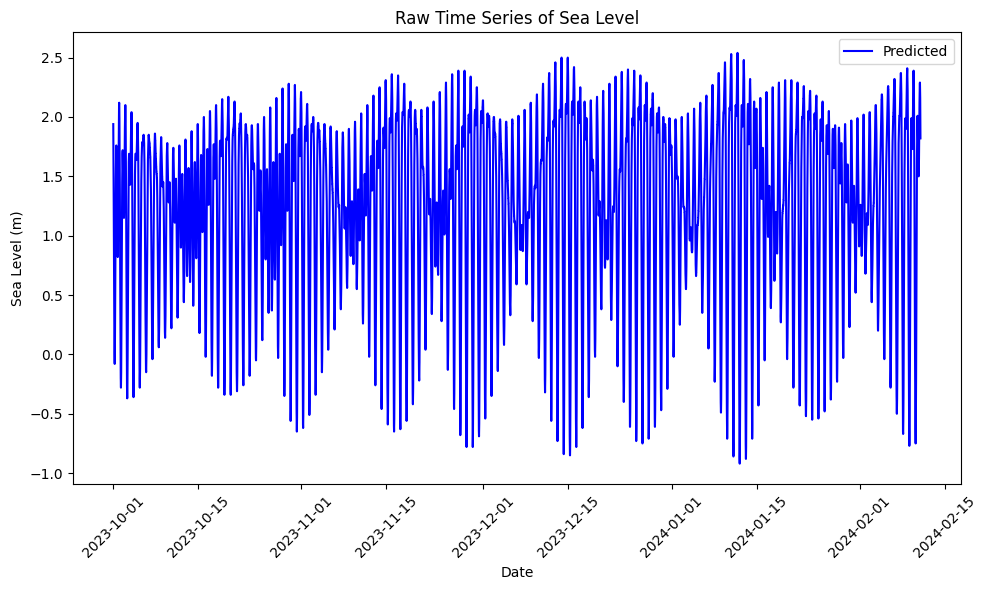

In [17]:
# Plotting the observed and predicted tides
fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(combined_df['DateTime'], combined_df['Prediction'], label='Observed', color='blue')
ax.plot(combined_df['DateTime'], combined_df['Prediction'], label='Predicted', color='blue')
ax.set_ylabel('Sea Level (m)')
ax.set_xlabel('Date')
ax.legend()
ax.set_title('Raw Time Series of Sea Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

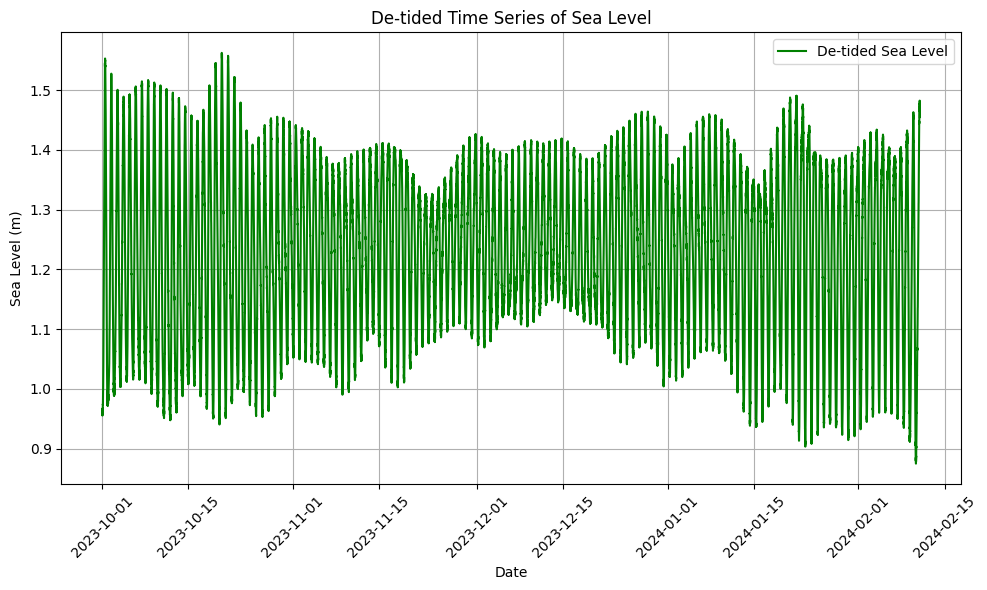

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(combined_df['DateTime'], combined_df['Prediction'] - reconstructed.h, label='De-tided Sea Level', color='green')
ax.set_ylabel('Sea Level (m)')
ax.set_xlabel('Date')
ax.set_title('De-tided Time Series of Sea Level')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


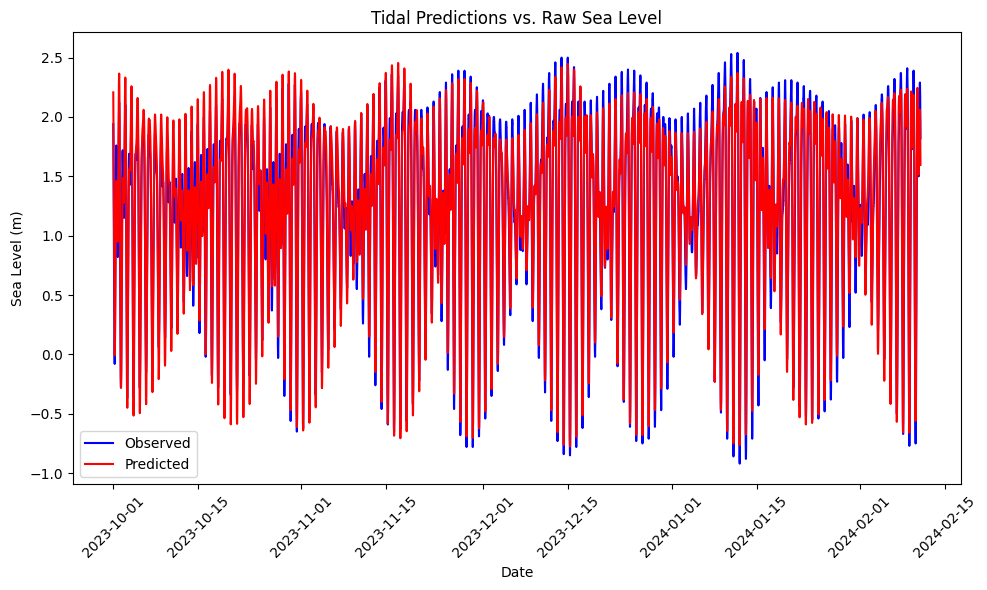

In [19]:
# Plotting the observed and predicted tides
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(combined_df['DateTime'], combined_df['Prediction'], label='Observed', color='blue')
ax.plot(combined_df['DateTime'], reconstructed.h+ np.mean(combined_df['Prediction']), label='Predicted', color='red')
ax.set_ylabel('Sea Level (m)')
ax.set_xlabel('Date')
ax.legend()
ax.set_title('Tidal Predictions vs. Raw Sea Level')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Assuming 'coef' is the output from the UTide solve function

# Extracting names, amplitudes, and phases
names = coef['name']
amplitudes = coef['A']
phases = coef['g']

# Identify major tidal constituents based on amplitude, or simply list a selection of known major constituents
# For demonstration, this prints all constituents; in practice, you might filter for specific major ones
print("Tidal Constituent, Amplitude, Phase")
for name, amp, phase in zip(names, amplitudes, phases):
    print(f"{name}: Amplitude = {amp:.3f} m, Phase = {phase:.2f} degrees")


Tidal Constituent, Amplitude, Phase
K1: Amplitude = 0.723 m, Phase = 258.34 degrees
M2: Amplitude = 0.513 m, Phase = 307.05 degrees
O1: Amplitude = 0.389 m, Phase = 241.76 degrees
S2: Amplitude = 0.144 m, Phase = 321.55 degrees
N2: Amplitude = 0.107 m, Phase = 279.60 degrees
Q1: Amplitude = 0.059 m, Phase = 236.29 degrees
J1: Amplitude = 0.051 m, Phase = 269.68 degrees
NO1: Amplitude = 0.030 m, Phase = 260.01 degrees
MU2: Amplitude = 0.023 m, Phase = 224.13 degrees
MM: Amplitude = 0.022 m, Phase = 292.39 degrees
OO1: Amplitude = 0.022 m, Phase = 293.83 degrees
MK3: Amplitude = 0.019 m, Phase = 23.57 degrees
MO3: Amplitude = 0.018 m, Phase = 19.67 degrees
M6: Amplitude = 0.015 m, Phase = 196.14 degrees
M4: Amplitude = 0.014 m, Phase = 101.69 degrees
L2: Amplitude = 0.012 m, Phase = 19.64 degrees
MSF: Amplitude = 0.009 m, Phase = 18.38 degrees
MS4: Amplitude = 0.009 m, Phase = 117.19 degrees
MN4: Amplitude = 0.007 m, Phase = 68.84 degrees
2Q1: Amplitude = 0.005 m, Phase = 264.29 degrees
